In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv(r'Tableaux_csv/df_countries.csv', header=[0,1])

In [3]:
data2 = pd.read_csv(r'data_complete_net_exports.csv')
data2

,LOCATION,Country,VARIABLE,Variable,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,LF,Labour force,Q,Quarterly,1995-Q1,Q1-1995,PER,Persons,0,Units,NaN,NaN,8.856843e+06,NaN,NaN
1,AUS,Australia,LF,Labour force,Q,Quarterly,1995-Q2,Q2-1995,PER,Persons,0,Units,NaN,NaN,8.939832e+06,NaN,NaN
2,AUS,Australia,LF,Labour force,Q,Quarterly,1995-Q3,Q3-1995,PER,Persons,0,Units,NaN,NaN,8.969251e+06,NaN,NaN
3,AUS,Australia,LF,Labour force,Q,Quarterly,1995-Q4,Q4-1995,PER,Persons,0,Units,NaN,NaN,9.020135e+06,NaN,NaN
4,AUS,Australia,LF,Labour force,Q,Quarterly,1996-Q1,Q1-1996,PER,Persons,0,Units,NaN,NaN,9.040712e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q1,Q1-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.003470e+11,NaN,NaN
20196,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q2,Q2-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.016932e+11,NaN,NaN
20197,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q3,Q3-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.030033e+11,NaN,NaN
20198,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q4,Q4-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.042660e+11,NaN,NaN


In [23]:
serie = data2.loc[data2['Country'] == 'United States'].loc[data2['VARIABLE'] == 'GDPVD']['Value'].reset_index().drop('index', axis = 1)
serie

,Value
0,1.104836e+13
1,1.108132e+13
2,1.117558e+13
3,1.125147e+13
4,1.133574e+13
...,...
96,1.981764e+13
97,1.993977e+13
98,2.006637e+13
99,2.019160e+13


<AxesSubplot:>

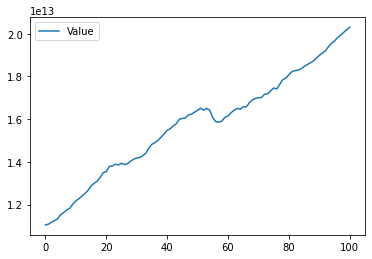

In [24]:
serie.plot()

<AxesSubplot:>

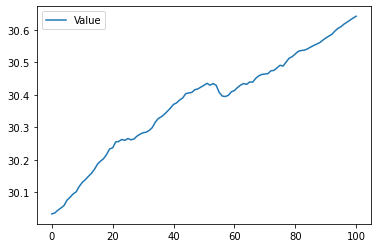

In [18]:
log_serie = np.log(serie)
log_serie.plot()

<AxesSubplot:>

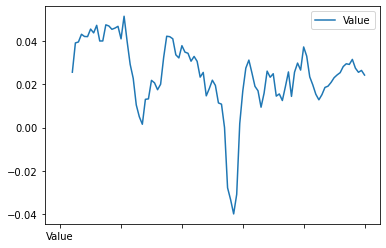

In [21]:
log_diff_serie = log_serie - log_serie.shift(4)
log_diff_serie = log_diff_serie.dropna()
log_diff_serie.plot()

In [26]:
pays_ocde = [i for i in data2['Country'].unique()]
variables = [i for i in data2['VARIABLE'].unique()]

In [63]:
#Préparation des fonctions
#np.set_printoptions(suppress=True)

def kpss_test(serie1):    
    return(round(kpss(serie1)[1], 3))

def kpss_logdiff(serie1):
    serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
    return(round(kpss_test(serie2), 3))

def adf_test(serie1, **kw):
    return(round(adfuller(serie1, **kw)[1], 3))

def adf_logdiff(serie1):
    serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
    return(round(adf_test(serie2),3))

In [64]:
# Exemple avec la série temporelle du PIB des USA

serie1 = data2.loc[data2['Country'] == 'United States'].loc[data2['VARIABLE'] == 'GDPVD']['Value'].reset_index().drop('index', axis = 1)

print('P-value pour le test KPSS de la série brute:', kpss_test(serie1))
print('P-value pour le test KPSS de la série log différenciée:', kpss_logdiff(serie1))

#KPSS H0, la série est stationnaire, donc on rejette à 5% la stationnarité si la p-value est <5%

print('P-value pour le test ADF de la série brute:', adf_test(serie1))
print('P-value pour le test ADF de la série log différenciée:', adf_logdiff(serie1))

#ADF H0, la série n'est pas stationnaire, donc si p-value < 5%, on rejette H0 et la série est stationnaire

P-value pour le test KPSS de la série brute: 0.01
P-value pour le test KPSS de la série log différenciée: 0.1
P-value pour le test ADF de la série brute: 0.883
P-value pour le test ADF de la série log différenciée: 0.079


C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

In [65]:
# Tableau des p-value des test ADF sur les séries brutes (on s'attend à ne pas avoir beaucoup de séries stationnaires)

tabadf_brut = pd.DataFrame(index= variables, columns= pays_ocde)

for a in pays_ocde: 
    for b in variables: 
        serie1 = data2.loc[data2['Country'] == a].loc[data2['VARIABLE'] == b]['Value'].reset_index().drop('index', axis = 1)
        tabadf_brut[a][b] = adf_test(serie1)
tabadf_brut = tabadf_brut.T
tabadf_brut = tabadf_brut.rename(columns={"LF": "Actifs", "ET": "Emplois", 'GDPVD': 'PIB volume ppa', 'IT': 'Investissement', 'CP':'Consommation', 'UNR': 'Taux de chômage', 'FBGS': 'Exportation nette', 'GDP': 'PIB nominal'})
tabadf_brut.style.applymap(lambda x: 'background-color : yellow' if x < 0.05 else '')
# Les valeurs en jaune correspondent aux p-value des séries stationnaires

,Actifs,Emplois,PIB volume ppa,Investissement,Consommation,Taux de chômage,Exportation nette,PIB nominal
Australia,1.000000,0.998000,0.990000,0.945000,1.000000,0.332000,0.077000,0.999000
Austria,0.995000,0.996000,0.806000,0.999000,0.999000,0.231000,0.581000,0.996000
Belgium,0.912000,0.918000,0.563000,0.987000,0.991000,0.010000,0.794000,0.982000
Canada,0.207000,0.608000,0.754000,0.791000,1.000000,0.219000,0.898000,0.970000
Denmark,0.909000,0.559000,0.841000,0.856000,0.984000,0.174000,0.247000,0.973000
Finland,0.476000,0.166000,0.164000,0.789000,0.947000,0.000000,0.871000,0.899000
France,0.293000,0.767000,0.636000,0.887000,0.924000,0.177000,0.681000,0.834000
Germany,0.995000,0.992000,0.946000,0.999000,0.999000,0.935000,0.652000,0.999000
Hungary,0.995000,0.792000,0.967000,0.999000,0.979000,0.400000,0.810000,0.996000
Iceland,0.978000,0.938000,0.930000,0.887000,1.000000,0.381000,0.523000,1.000000


In [53]:
# On rempli le tableau avec les p-value du test ADF

tabadf = pd.DataFrame(index= variables, columns=pays_ocde)

for a in pays_ocde: 
    for b in variables: 
        serie1=data2.loc[data2['Country'] == a].loc[data2['VARIABLE'] == b]['Value'].reset_index().drop('index', axis = 1)
        
        p=adf_test(serie1)
       
        if p < 0.05:
            tabadf[a][b]=adf_test(serie1)
        else :
            try: tabadf[a][b]=adf_logdiff(serie1)
            except: tabadf[a][b] = 99
tabadf = tabadf.T

<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
<ipython-input-27-559e3df99ca8>:15: RuntimeWarning: invalid value encountered in log
  serie2 = (np.log(serie1) 

In [54]:
tabadf = tabadf.rename(columns={"LF": "Actifs", "ET": "Emplois", 'GDPVD': 'PIB volume ppa', 'IT': 'Investissement', 'CP':'Consommation', 'UNR': 'Taux de chômage', 'FBGS': 'Exportation nette', 'GDP': 'PIB nominal'})
tabadf.style.applymap(lambda x: 'background-color : yellow' if x < 0.05 else '')

# Les valeurs en jaune correspondent aux p-value des séries stationnaires

,Actifs,Emplois,PIB volume ppa,Investissement,Consommation,Taux de chômage,Exportation nette,PIB nominal
Australia,0.174000,0.083000,0.111000,0.533000,0.904000,0.352000,0.244000,0.577000
Austria,0.024000,0.044000,0.330000,0.123000,0.087000,0.129000,0.001000,0.074000
Belgium,0.724000,0.037000,0.098000,0.258000,0.360000,0.010000,0.096000,0.202000
Canada,0.725000,0.525000,0.119000,0.011000,0.444000,0.138000,0.004000,0.059000
Denmark,0.214000,0.342000,0.327000,0.005000,0.032000,0.010000,0.002000,0.396000
Finland,0.081000,0.155000,0.021000,0.104000,0.610000,0.000000,0.000000,0.015000
France,0.693000,0.030000,0.102000,0.003000,0.203000,0.179000,0.808000,0.400000
Germany,0.049000,0.181000,0.001000,0.152000,0.096000,0.474000,0.001000,0.027000
Hungary,0.541000,0.425000,0.581000,0.363000,0.241000,0.532000,0.000000,0.351000
Iceland,0.034000,0.050000,0.135000,0.013000,0.016000,0.015000,0.000000,0.141000


In [39]:
tabkpss_brut = pd.DataFrame(index= variables, columns=pays_ocde)

for a in pays_ocde: 
    for b in variables: 
        serie1 = data2.loc[data2['Country'] == a].loc[data2['VARIABLE'] == b]['Value'].reset_index().drop('index', axis = 1)
        serie1.dropna(inplace=True)
        tabkpss_brut[a][b] = kpss_test(serie1)
tabkpss_brut = tabkpss_brut.T
tabkpss_brut = tabkpss_brut.rename(columns={"LF": "Actifs", "ET": "Emplois", 'GDPVD': 'PIB volume ppa', 'IT': 'Investissement', 'CP':'Consommation', 'UNR': 'Taux de chômage', 'FBGS': 'Exportation nette', 'GDP': 'PIB nominal'})

'''
La p-value exacte n'est affichée que si elle est entre 0 et 0.1:
au dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série
'''

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\s

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


"\nLa p-value exacte n'est affichée que si elle est entre 0 et 0.1:\nau dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série\n"

In [40]:
tabkpss_brut.style.applymap(lambda x: 'background-color : yellow' if x > 0.05 else '')
# Peu de séries brutes stationnaires en dehors du chômage

,Actifs,Emplois,PIB volume ppa,Investissement,Consommation,Taux de chômage,Exportation nette,PIB nominal
Australia,0.010000,0.010000,0.010000,0.010000,0.010000,0.042000,0.100000,0.010000
Austria,0.010000,0.010000,0.010000,0.010000,0.010000,0.039000,0.010000,0.010000
Belgium,0.010000,0.010000,0.010000,0.010000,0.010000,0.078000,0.047000,0.010000
Canada,0.010000,0.010000,0.010000,0.010000,0.010000,0.040000,0.018000,0.010000
Denmark,0.010000,0.046000,0.010000,0.010000,0.010000,0.100000,0.017000,0.010000
Finland,0.010000,0.013000,0.010000,0.010000,0.010000,0.029000,0.018000,0.010000
France,0.010000,0.010000,0.010000,0.010000,0.010000,0.100000,0.016000,0.010000
Germany,0.010000,0.010000,0.010000,0.011000,0.010000,0.017000,0.010000,0.010000
Hungary,0.010000,0.023000,0.010000,0.010000,0.010000,0.100000,0.018000,0.010000
Iceland,0.010000,0.010000,0.010000,0.013000,0.010000,0.100000,0.098000,0.010000


In [43]:
tabkpss = pd.DataFrame(index= variables, columns=pays_ocde)

for a in pays_ocde: 
    for b in variables: 
        serie1=data2.loc[data2['Country'] == a].loc[data2['VARIABLE'] == b]['Value'].reset_index().drop('index', axis = 1)
        serie1.dropna(inplace=True)
        
        p=kpss_test(serie1)
       
        if p > 0.05:
            tabkpss[a][b]=kpss_test(serie1)
        else :
            tabkpss[a][b]=kpss_logdiff(serie1)
tabkpss = tabkpss.T
tabkpss = tabkpss.rename(columns={"LF": "Actifs", "ET": "Emplois", 'GDPVD': 'PIB volume ppa', 'IT': 'Investissement', 'CP':'Consommation', 'UNR': 'Taux de chômage', 'FBGS': 'Exportation nette', 'GDP': 'PIB nominal'})

'''
La p-value exacte n'est affichée que si elle est entre 0 et 0.1:
au dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série
'''

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is 

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is 

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is 

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is 

"\nLa p-value exacte n'est affichée que si elle est entre 0 et 0.1:\nau dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série\n"

In [44]:
tabkpss.style.applymap(lambda x: 'background-color : yellow' if x > 0.05 else '')
# quasi toutes les séries log différenciées sont stationnaires

,Actifs,Emplois,PIB volume ppa,Investissement,Consommation,Taux de chômage,Exportation nette,PIB nominal
Australia,0.100000,0.100000,0.017000,0.080000,0.032000,0.100000,0.100000,0.098000
Austria,0.074000,0.089000,0.100000,0.100000,0.100000,0.100000,0.086000,0.100000
Belgium,0.100000,0.100000,0.074000,0.100000,0.100000,0.078000,0.100000,0.100000
Canada,0.048000,0.079000,0.089000,0.055000,0.025000,0.100000,0.100000,0.084000
Denmark,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.098000
Finland,0.100000,0.100000,0.063000,0.100000,0.017000,0.100000,0.077000,0.080000
France,0.053000,0.100000,0.100000,0.100000,0.071000,0.100000,0.090000,0.065000
Germany,0.100000,0.070000,0.100000,0.086000,0.100000,0.055000,0.099000,0.100000
Hungary,0.100000,0.100000,0.100000,0.100000,0.024000,0.100000,0.100000,0.025000
Iceland,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.098000,0.100000


In [5]:
df = pd.read_csv(r'dfR_complete_netexp.csv')
df

,index,LOCATION,TIME,PIB,Actifs,Emplois,Chomage,ID_country,Conso_share,Invest_share,NExport_share,Labor_prod
0,0,AUS,1995-Q1,0.000000,0.000000,0.000000,8.800723,1.0,0.579363,0.246620,-0.017240,0.000000
1,1,AUS,1995-Q2,0.004244,0.009370,0.013728,8.406955,1.0,0.584840,0.238729,-0.019558,-0.009399
2,2,AUS,1995-Q3,0.027058,0.012692,0.017967,8.325610,1.0,0.578670,0.248747,-0.009291,0.018290
3,3,AUS,1995-Q4,0.028282,0.018437,0.023488,8.348373,1.0,0.575768,0.232487,-0.009786,-0.004218
4,4,AUS,1996-Q1,0.045068,0.020760,0.025199,8.404165,1.0,0.576638,0.237397,-0.002104,0.014523
...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2520,DNK,2019-Q1,0.440993,0.093558,0.117343,4.887160,7.0,0.469506,0.211695,0.066560,0.001701
2521,2521,DNK,2019-Q2,0.447451,0.095739,0.119849,4.863579,7.0,0.469726,0.213466,0.065497,0.002232
2522,2522,DNK,2019-Q3,0.453737,0.097924,0.122360,4.839993,7.0,0.469930,0.214890,0.064744,0.002093
2523,2523,DNK,2019-Q4,0.459795,0.100113,0.124877,4.816400,7.0,0.470184,0.216002,0.064110,0.001919


In [16]:
usa_pib = df.loc[df['LOCATION'] == 'USA'][['TIME','PIB']].reset_index().drop('index', axis = 1)
usa_pib
#usa_chom = data2.loc[data2['Country'] == 'United States'].loc[data2['VARIABLE'] == 'UNR']['Value'].reset_index().drop('index', axis = 1)
#usa_conso = LF": "Actifs", "ET": "Emplois", 'GDPVD': 'PIB volume ppa', 'IT': 'Investissement', 'CP':'Consommation', 'UNR': 'Taux de chômage', 'FBGS': 'Exportation nette', 'GDP': 'PIB nominal'

AttributeError: 'Series' object has no attribute 'asdate'

In [21]:
usa_pib['TIME'] = pd.to_datetime(usa_pib['TIME'])

In [10]:
import matplotlib.pyplot as plt

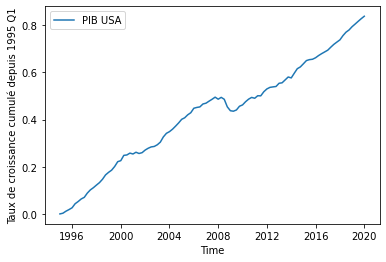

In [22]:
plt.plot(usa_pib['TIME'], usa_pib['PIB'], label = 'PIB USA')
plt.xlabel('Time')
plt.ylabel('Taux de croissance cumulé depuis 1995 Q1')
plt.legend()
plt.show()

In [28]:
#LF": "Actifs", "ET": "Emplois", 'GDPVD': 'PIB volume ppa', 'IT': 'Investissement', 'CP':'Consommation', 
#'UNR': 'Taux de chômage', 'FBGS': 'Exportation nette', 'GDP': 'PIB nominal'''
df['LOCATION'].unique()

array(['AUS', 'AUT', 'CAN', 'FIN', 'FRA', 'IRL', 'JPN', 'NLD', 'NZL',
       'NOR', 'LUX', 'CHE', 'ESP', 'SVK', 'ITA', 'HUN', 'PRT', 'USA',
       'ISL', 'DEU', 'GBR', 'BEL', 'SWE', 'KOR', 'DNK'], dtype=object)

In [59]:
country = ['USA', 'ISL', 'JPN', 'PRT']

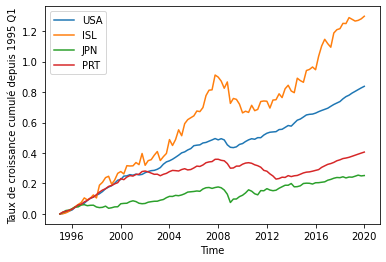

In [60]:
for c in country:
    plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == c]['PIB'].reset_index().drop('index', axis = 1)['PIB'], label = c)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Taux de croissance cumulé depuis 1995 Q1')
plt.savefig(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\statdesc_pib.png')
plt.show()


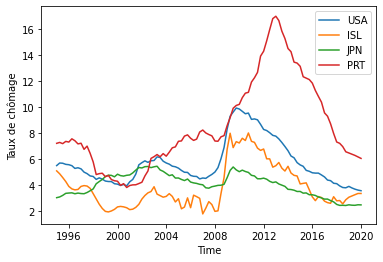

In [61]:
for c in country:
    plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == c]['Chomage'].reset_index().drop('index', axis = 1)['Chomage'], label = c)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Taux de chômage')
plt.savefig(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\statdesc_cho.png')
plt.show()

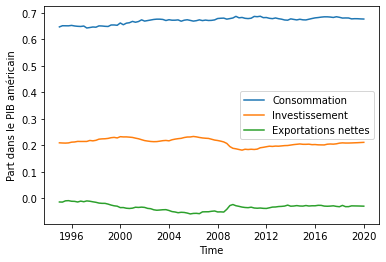

In [62]:
plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == 'USA']['Conso_share'].reset_index().drop('index', axis = 1)['Conso_share'], label = 'Consommation')
plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == 'USA']['Invest_share'].reset_index().drop('index', axis = 1)['Invest_share'], label = 'Investissement')
plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == 'USA']['NExport_share'].reset_index().drop('index', axis = 1)['NExport_share'], label = 'Exportations nettes')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Part dans le PIB américain')
plt.savefig(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\statdesc_share.png')
plt.show()

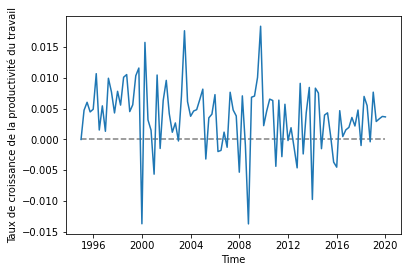

In [63]:
plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == 'USA']['Labor_prod'].reset_index().drop('index', axis = 1)['Labor_prod'])
plt.hlines(0, usa_pib['TIME'][0], usa_pib['TIME'][100], linestyles = 'dashed', color = 'grey')
plt.xlabel('Time')
plt.ylabel('Taux de croissance de la productivité du travail')
plt.savefig(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\statdesc_prod.png')
plt.show()

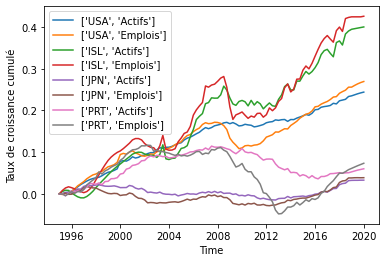

In [69]:
for c in country: 
    plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == c]['Actifs'].reset_index().drop('index', axis = 1)['Actifs'], label = [c, 'Actifs'])
    plt.plot(usa_pib['TIME'], df.loc[df['LOCATION'] == c]['Emplois'].reset_index().drop('index', axis = 1)['Emplois'], label = [c, 'Emplois'])

plt.legend()
plt.xlabel('Time')
plt.ylabel('Taux de croissance cumulé')
plt.savefig(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\statdesc_actemp.png')
plt.show()